CPUs available: 48
Matrix 1000x1000 multiplication elapsed: 4.97s
CPU % per core: [19.1, 6.3, 6.1, 6.0, 5.1, 6.0, 13.3, 6.0, 17.2, 1.0, 30.3, 6.0, 21.8, 7.1, 11.1, 5.0, 13.3, 5.1, 22.4, 8.1, 12.2, 6.0, 15.0, 11.0, 11.1, 2.0, 9.9, 2.0, 13.1, 24.8, 31.3, 8.0, 7.9, 17.8, 19.0, 2.0, 11.1, 35.6, 6.9, 100.0, 9.2, 4.0, 6.2, 11.1, 7.1, 5.9, 17.2, 6.1]
Memory % used: 21.5


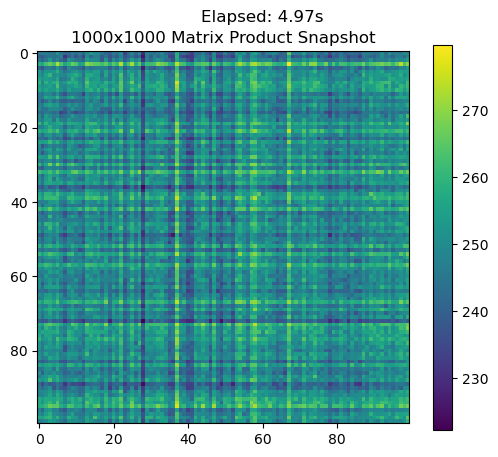

Matrix 1200x1200 multiplication elapsed: 5.63s
CPU % per core: [28.1, 4.2, 9.2, 6.0, 17.5, 7.9, 4.1, 8.0, 5.1, 2.0, 20.2, 6.1, 7.1, 10.1, 8.1, 6.0, 64.4, 5.9, 12.2, 9.0, 10.3, 9.0, 10.1, 2.0, 13.0, 6.1, 20.2, 1.0, 9.2, 4.0, 26.0, 8.1, 14.1, 5.0, 5.1, 5.0, 7.2, 6.1, 5.0, 100.0, 26.3, 8.0, 10.1, 13.9, 22.2, 5.9, 13.1, 6.0]
Memory % used: 21.4


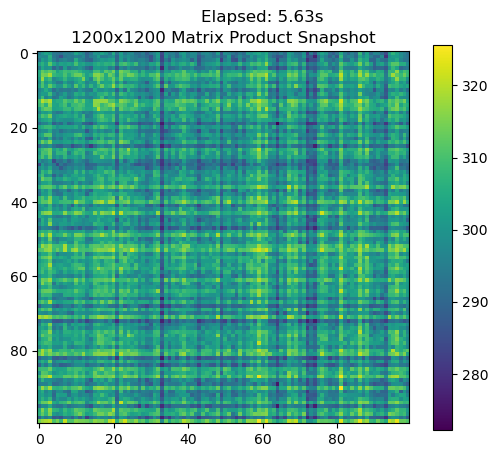

Parallel 4x 800x800 matrices elapsed: 11.47s
CPU % per core: [15.5, 5.9, 12.8, 10.2, 15.6, 6.4, 33.9, 6.4, 19.3, 3.6, 11.1, 18.9, 18.2, 13.9, 10.2, 7.3, 37.6, 3.7, 8.3, 12.6, 9.2, 6.4, 12.8, 10.1, 19.4, 2.7, 25.9, 13.0, 12.0, 8.1, 10.1, 6.4, 8.2, 9.2, 27.1, 15.6, 24.8, 3.6, 9.2, 100.0, 22.0, 5.5, 7.4, 49.1, 42.2, 32.7, 16.8, 6.4]
Memory % used: 21.5


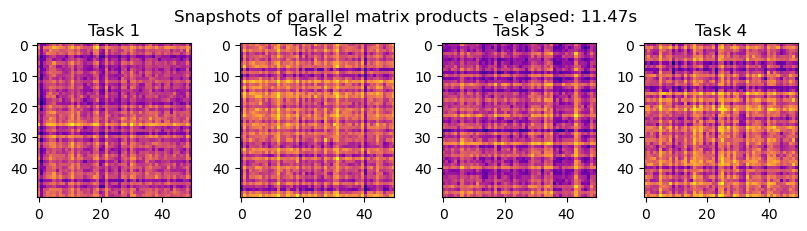

Monte Carlo π estimation: 3.141546, elapsed: 8.21s


In [ ]:
import numpy as np
from numba import njit, prange
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import time, multiprocessing, psutil

print('CPUs available:', multiprocessing.cpu_count())


# Helper function to print CPU/memory
def show_sys_stats():
    print('CPU % per core:', psutil.cpu_percent(interval=1, percpu=True))
    print('Memory % used:', psutil.virtual_memory().percent)

# 1. Sequential large matrix multiplications
@njit(parallel=True)
def big_dot(A, B):
    n = A.shape[0]
    C = np.zeros((n, n))
    for i in prange(n):
        for j in range(n):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]
    return C

sizes = [1000, 1200]
for n in sizes:
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)
    start = time.time()
    C = big_dot(A, B)
    elapsed = time.time() - start
    print(f"Matrix {n}x{n} multiplication elapsed: {elapsed:.2f}s")
    show_sys_stats()
    plt.figure(figsize=(6,5))
    plt.imshow(C[:100,:100], cmap='viridis')
    plt.title(f"{n}x{n} Matrix Product Snapshot")
    plt.suptitle(f"Elapsed: {elapsed:.2f}s", y=0.95)
    plt.colorbar()
    plt.show()


# 2. Parallel matrix multiplications
def mat_task(seed):
    np.random.seed(seed)
    A = np.random.rand(800, 800)
    B = np.random.rand(800, 800)
    return big_dot(A, B)

start = time.time()
results = Parallel(n_jobs=-1)(delayed(mat_task)(i) for i in range(4))
elapsed = time.time() - start
print(f"Parallel 4x 800x800 matrices elapsed: {elapsed:.2f}s")
show_sys_stats()

plt.figure(figsize=(10,2))
for i, R in enumerate(results):
    plt.subplot(1,4,i+1)
    plt.imshow(R[:50,:50], cmap='plasma')
    plt.title(f"Task {i+1}")
plt.suptitle(f"Snapshots of parallel matrix products - elapsed: {elapsed:.2f}s", y=1.05)
plt.show()


# 3. Monte Carlo π estimation
@njit(parallel=True)
def monte_carlo_pi(num_samples):
    count = 0
    for i in prange(num_samples):
        x, y = np.random.rand(), np.random.rand()
        if x**2 + y**2 <= 1:
            count += 1
    return count

samples = 300_000_000
start = time.time()
hits = monte_carlo_pi(samples)
pi_est = 4 * hits / samples
elapsed = time.time() - start
print(f"Monte Carlo π estimation: {pi_est:.6f}, elapsed: {elapsed:.2f}s")
show_sys_stats()



# 4. SVD computation
from scipy.linalg import svd
X = np.random.rand(1000, 1000)
start = time.time()
U, s, V = svd(X)
elapsed = time.time() - start
print(f"SVD of 1000x1000 matrix elapsed: {elapsed:.2f}s")
show_sys_stats()
plt.figure(figsize=(6,4))
plt.plot(s[:50], marker='o')
plt.title("Top 50 singular values of 1000x1000 matrix")
plt.suptitle(f"Elapsed: {elapsed:.2f}s", y=0.95)
plt.xlabel("Index")
plt.ylabel("Singular value")
plt.grid(True)
plt.show();
